In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [2]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [3]:
# Building the RNN (LSTM)
# Importing the Keras libraries and packages

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Compiling the RNN
regressor.compile(optimizer = 'adam',
                  loss = 'mean_squared_error')

regressor.fit(X_train,
              y_train,
              epochs = 100,
              batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 114ms/step - loss: 0.0027
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - loss: 0.0022
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 0.0025
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step - loss: 0.0025
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 0.0023
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - loss: 0.0023
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.0020
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 0.0021
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - loss: 0.0022
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 0.0022
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - loss: 0.0018
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - loss: 0.0019
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - loss: 0.0019
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - loss: 0.0022
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1

In [10]:
# Saving our model
path ="/content/google_stock_price_trend_prediction_rnn(lstm)_100Epochs.h5"
regressor.save(path)

In [11]:
# Loading our model

from tensorflow.keras.models import load_model

new_regressor = load_model(path)

In [12]:
# Making the predictions and visualising the results
# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = new_regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


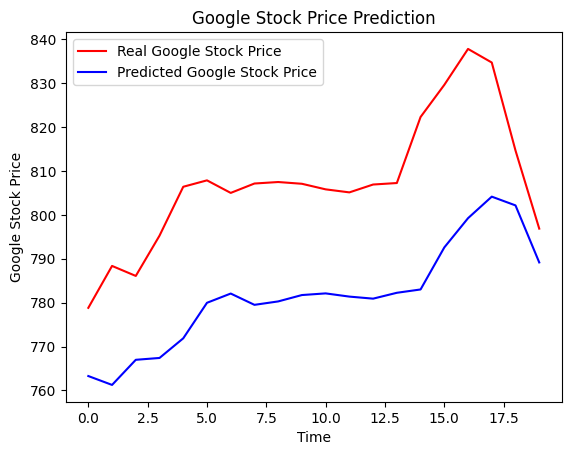

In [13]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()